Import What we need

In [2]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import random
from collections import Counter
from sklearn.decomposition import PCA


2024-01-20 15:55:45.209091: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-20 15:55:45.564177: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-20 15:55:45.565732: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-20 15:55:47.323063: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Read and collect data from actions directory

In [3]:
data_folder = 'actions'

data = []
labels = []
class_label_mapping = {}  


for class_label, class_folder in enumerate(os.listdir(data_folder)):
    class_path = os.path.join(data_folder, class_folder)

    if os.path.isdir(class_path):
        class_label_mapping[class_folder] = class_label

        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)

            # Check if the file is a numpy file (.npy)
            if file_name.endswith('.npy'):
                data_array = np.load(file_path)

                data.append(data_array)
                labels.append(class_label)

In [4]:
data = np.array(data)
labels = np.array(labels)

label_counts = Counter(labels)

#get the distinct labels and their counts
distinct_labels = list(label_counts.keys())
label_counts_list = list(label_counts.values())

print("Distinct labels and their counts:")
for label, count in zip(distinct_labels, label_counts_list):
    print(f"Label {label}: Count {count}")

Distinct labels and their counts:
Label 0: Count 1894
Label 1: Count 2489
Label 2: Count 1967
Label 3: Count 2590
Label 4: Count 1945
Label 5: Count 2165
Label 7: Count 2184
Label 8: Count 3011
Label 9: Count 2199
Label 10: Count 1584
Label 11: Count 1239
Label 12: Count 2132
Label 13: Count 1205
Label 14: Count 1751
Label 15: Count 1425
Label 16: Count 2466
Label 17: Count 2780


In [5]:
seed = 666
data, labels = shuffle(data, labels, random_state=seed)

Normalized data

In [6]:
reshaped_data = np.reshape(data, (data.shape[0] * data.shape[1], data.shape[2]))

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(reshaped_data)

normalized_data = np.reshape(normalized_data, (data.shape[0], data.shape[1], data.shape[2]))

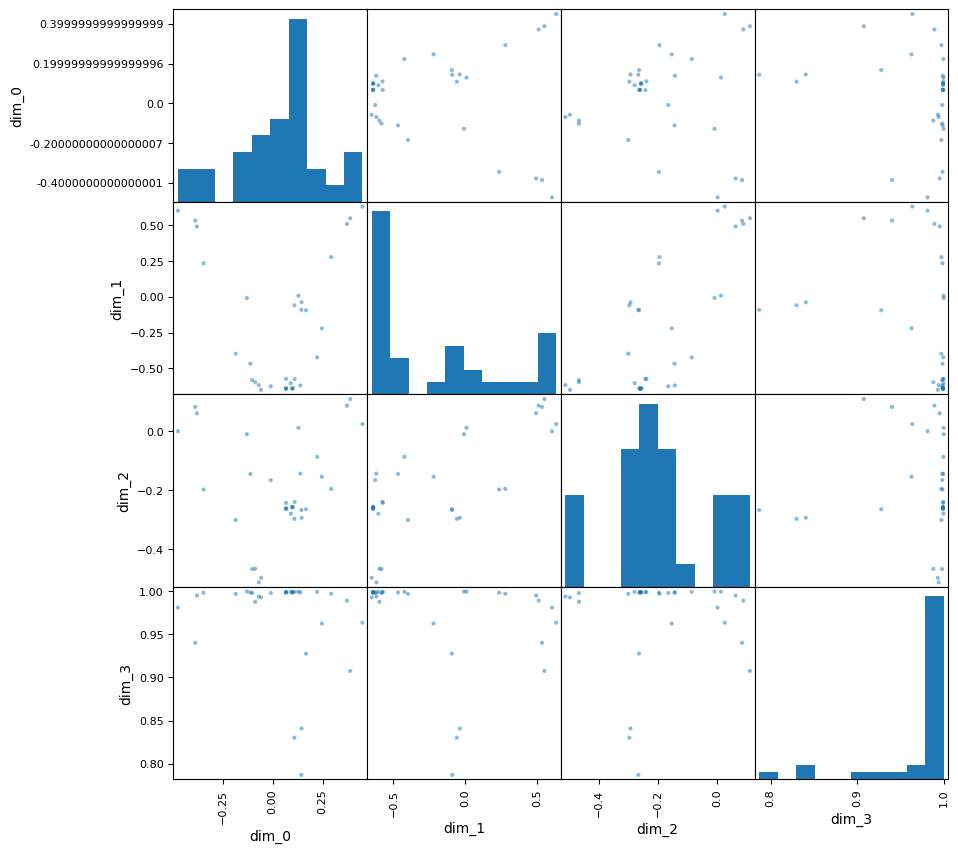

In [7]:
df = pd.DataFrame(data[80], columns=[f"dim_{i}" for i in range(data[80].shape[1])])


subset_data = df.iloc[:, :4]

# Create a pair plot using scatter_matrix
pd.plotting.scatter_matrix(subset_data, alpha=0.5, figsize=(10, 10), diagonal='hist')
plt.show()


use DecisionTreeClassifier

In [8]:
# Flatten the data for DecisionTreeClassifier
flattened_data = normalized_data.reshape((data.shape[0], -1))

# Split data i
X_train, X_test, y_train, y_test = train_test_split(flattened_data, labels, test_size=0.2, random_state=44)

# Initialize Decision Tree
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate the classifier on the test set
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on the test set: {accuracy}")

# Perform cross-validation on the scaled data
# Print classification report for more detailed evaluation metrics
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy on the test set: 0.9965743648301456
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       387
           1       1.00      0.99      1.00       522
           2       1.00      1.00      1.00       415
           3       0.99      0.99      0.99       517
           4       0.99      1.00      1.00       381
           5       1.00      0.99      1.00       424
           7       0.98      1.00      0.99       447
           8       1.00      1.00      1.00       581
           9       1.00      1.00      1.00       456
          10       1.00      1.00      1.00       331
          11       1.00      1.00      1.00       232
          12       1.00      1.00      1.00       416
          13       1.00      1.00      1.00       248
          14       1.00      1.00      1.00       318
          15       0.99      0.99      0.99       293
          16       0.99      0.99      0.99       492
          17 

First Improvment:

use early stop for DecisionTreeClassifier

In [9]:
classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5)

# Train the classifier
classifier.fit(X_train, y_train)


predictions = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on the test set: {accuracy}")

# classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy on the test set: 0.972166714244933
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       387
           1       0.99      0.98      0.99       522
           2       0.98      0.96      0.97       415
           3       0.95      0.97      0.96       517
           4       1.00      0.94      0.97       381
           5       0.93      0.98      0.96       424
           7       0.96      0.95      0.95       447
           8       0.93      0.99      0.96       581
           9       1.00      0.96      0.98       456
          10       0.93      0.99      0.96       331
          11       1.00      1.00      1.00       232
          12       0.98      1.00      0.99       416
          13       1.00      0.99      1.00       248
          14       1.00      1.00      1.00       318
          15       0.99      0.97      0.98       293
          16       0.97      0.92      0.94       492
          17  

Plot our confusion matrix

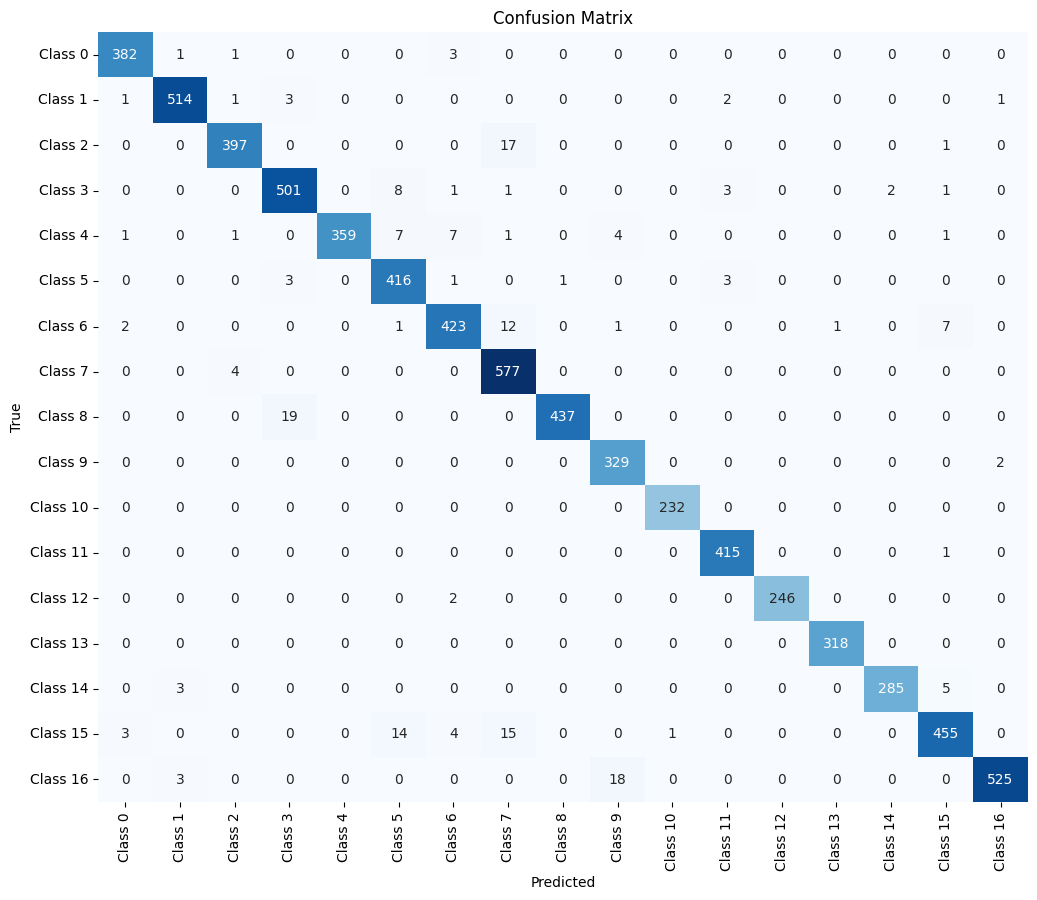

In [10]:
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix 
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[f'Class {i}' for i in range(17)],
            yticklabels=[f'Class {i}' for i in range(17)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

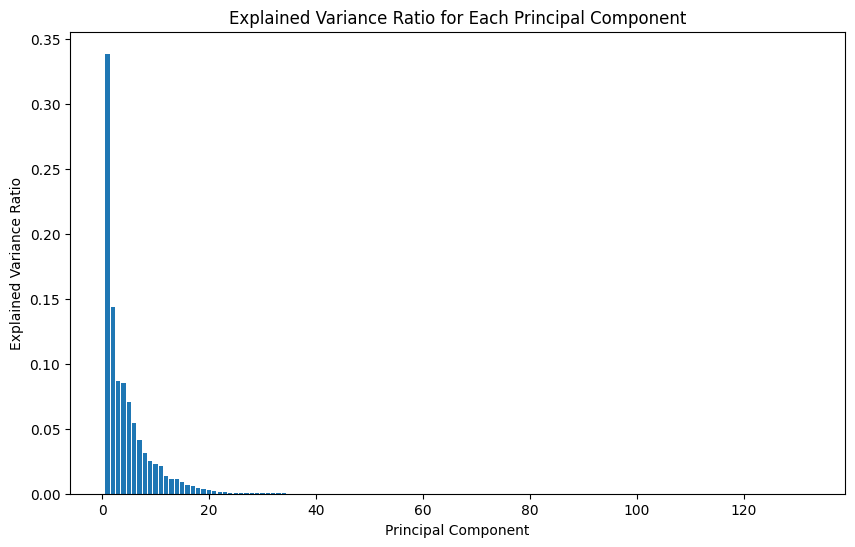

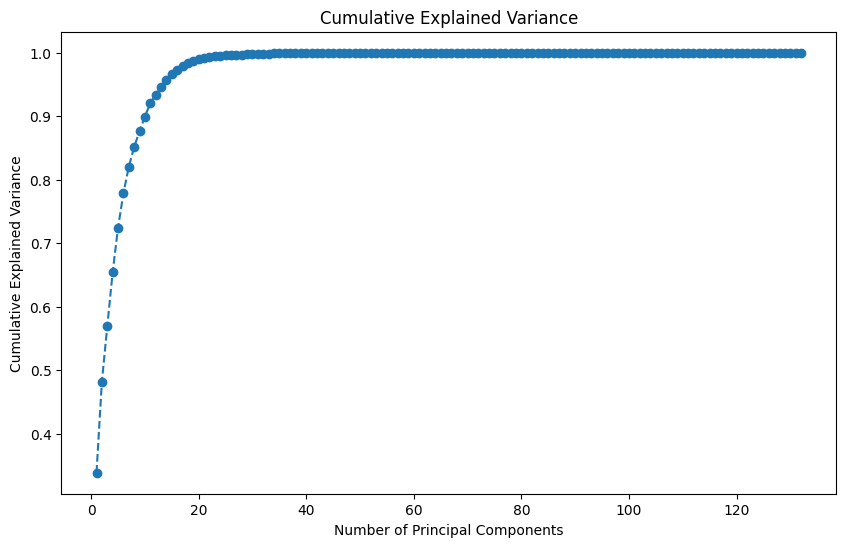

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
data_pca = pca.fit_transform(flattened_data)

# Plot explained variance ratio 
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Modify our data 

In [12]:
modified_data = normalized_data[: , :14, :3]

In [13]:
flattened_data = modified_data.reshape((data.shape[0], -1))


# Split the scaled data 
X_train, X_test, y_train, y_test = train_test_split(flattened_data, labels, test_size=0.2, random_state=44)

classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5)

# Train the classifier
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on the test set: {accuracy}")

# Print classification report 
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy on the test set: 0.9414787325149871
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       387
           1       0.97      0.97      0.97       522
           2       0.96      0.98      0.97       415
           3       0.86      0.99      0.92       517
           4       0.89      0.86      0.88       381
           5       0.96      0.83      0.89       424
           7       0.85      0.86      0.86       447
           8       0.96      0.99      0.98       581
           9       1.00      0.97      0.99       456
          10       0.96      0.96      0.96       331
          11       0.97      0.89      0.93       232
          12       0.84      0.93      0.88       416
          13       0.98      1.00      0.99       248
          14       1.00      1.00      1.00       318
          15       1.00      0.99      0.99       293
          16       0.97      0.89      0.93       492
          17 

In [15]:
import joblib

# Save the trained model
joblib.dump(classifier, 'decision_tree_model.joblib')

['decision_tree_model.joblib']

Creat fake data

In [19]:
def augment_data(original_data, original_labels, num_augmented_samples):
    augmented_data = []
    augmented_labels = []

    for _ in range(num_augmented_samples):
        # Apply random noise to each feature

        random_integer = random.randint(1, len(original_data))
        random_double = random.uniform(0, 0.02)

        noisy_data = original_data[random_integer] + np.random.normal(0, random_double, size= (14, 3))
        augmented_data.append(noisy_data)
        augmented_labels.append(original_labels[random_integer])

    return np.array(augmented_data), np.array(augmented_labels)



In [28]:
num_augmented_samples = 5000  
augmented_data, augmented_labels = augment_data(modified_data, labels, num_augmented_samples)

In [29]:
predictions = classifier.predict(augmented_data.reshape((augmented_data.shape[0], -1)))  

accuracy = accuracy_score(augmented_labels, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7838
